In [1]:
# Import dependencies
import tensorflow as tf
import numpy as np

import pylab
%matplotlib inline

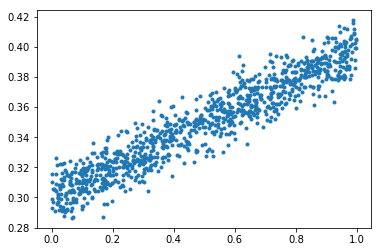

In [2]:
# Create input data
x_data = np.random.rand(1000).astype(np.float32)
noise = np.random.normal(scale= 0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Plot the data
pylab.plot(x_data, y_data, '.')

## Remember 3 Important Things:

1. Inference Graph
2. Define your loss and optimizer
3. And, training is basically to minimise the loss

In [3]:
# building Inference Graph
W = tf.Variable(tf.random_uniform([1], 0.0, 0.1), name= 'weights')
b = tf.Variable(tf.zeros([1]), name= 'bais')

y = W * x_data + b

In [4]:
print(W.name)
print(b.name)

weights:0
bais:0


In [5]:
#build training graph
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()


# print('loss', loss)
# print('optimizer', optimizer)
# print('train', train)
# print(init)

In [6]:
# What we built so far
# print(tf.get_default_graph().as_graph_def())

In [7]:
sess = tf.Session()
sess.run(init)
y_initial_value = sess.run(y)

# Print Weight and Bias
print(sess.run([W, b]))

[array([ 0.0913196], dtype=float32), array([ 0.], dtype=float32)]


In [8]:
# Training
for step in range(200):
    sess.run(train)
    
print(sess.run([W, b]))

[array([ 0.09831515], dtype=float32), array([ 0.30033824], dtype=float32)]


(-0.1, 1.0)

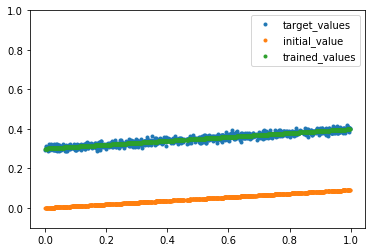

In [9]:
# compare the results

pylab.plot(x_data, y_data, '.', label = 'target_values')
pylab.plot(x_data, y_initial_value, '.', label = 'initial_value')
pylab.plot(x_data, sess.run(y), '.', label = 'trained_values')
pylab.legend()
pylab.ylim(-0.1, 1.0)